In [2]:
# import libraries
import os
import sys

import pandas as pd
import numpy as np
import sqlite3
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import random
import time

from PIL import Image

# !pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import ast
import re

In [14]:
import plotly.express as px

In [3]:
# connect to music sqlite3 database 
conn = sqlite3.connect('music.db')
c = conn.cursor()

In [6]:
tracks = pd.read_sql("SELECT * FROM track", conn)
af = pd.read_sql("SELECT * FROM audio_features", conn)
artists = pd.read_sql("SELECT * FROM artist", conn)
lyrics = pd.read_sql("SELECT * FROM lyrics", conn)

In [13]:
tracks.columns, af.columns, artists.columns, lyrics.columns

(Index(['album_name', 'album_id', 'artist_name', 'artist_id', 'disc_number',
        'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'name',
        'popularity', 'track_number', 'type', 'uri'],
       dtype='object'),
 Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
        'time_signature'],
       dtype='object'),
 Index(['external_urls', 'followers', 'genre', 'href', 'id', 'name',
        'popularity', 'type'],
       dtype='object'),
 Index(['song_name', 'text', 'song_name_orig', 'spotify_id'], dtype='object'))

In [8]:
af.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000
mean,0.683141,0.630387,5.633803,-6.356134,0.514085,0.127963,0.213328,0.006083,0.175967,0.498935,121.36669,197445.535211,3.957746
std,0.155044,0.149879,3.861942,2.377737,0.501571,0.108719,0.231495,0.055957,0.130599,0.219462,28.35365,34653.632207,0.392722
min,0.218000,0.186000,0.000000,-19.167000,0.000000,0.025900,0.001460,0.000000,0.057400,0.059900,65.37500,132024.000000,1.000000
25%,0.583500,0.529250,2.000000,-7.372250,0.000000,0.045175,0.033100,0.000000,0.098200,0.321750,97.87350,175190.750000,4.000000
50%,0.704500,0.622500,6.000000,-6.005000,1.000000,0.075700,0.128500,0.000000,0.124500,0.508000,119.55250,195556.000000,4.000000
75%,0.806750,0.743250,9.000000,-4.725250,1.000000,0.187000,0.307250,0.000009,0.201250,0.674750,143.99750,212738.750000,4.000000
max,0.929000,0.955000,11.000000,-2.703000,1.000000,0.481000,0.902000,0.657000,0.790000,0.962000,179.87000,361027.000000,5.000000


In [22]:
fig = px.histogram(tracks, x='popularity', nbins=20)
fig.show()

[Text(0, 0, 'The Weeknd'),
 Text(0, 0, 'Rod Wave'),
 Text(0, 0, 'Lil Uzi Vert'),
 Text(0, 0, 'Bad Bunny'),
 Text(0, 0, 'Lil Baby'),
 Text(0, 0, 'Megan Thee Stallion'),
 Text(0, 0, 'Dua Lipa'),
 Text(0, 0, 'Kelsea Ballerini'),
 Text(0, 0, 'Thomas Rhett'),
 Text(0, 0, 'Justin Bieber')]

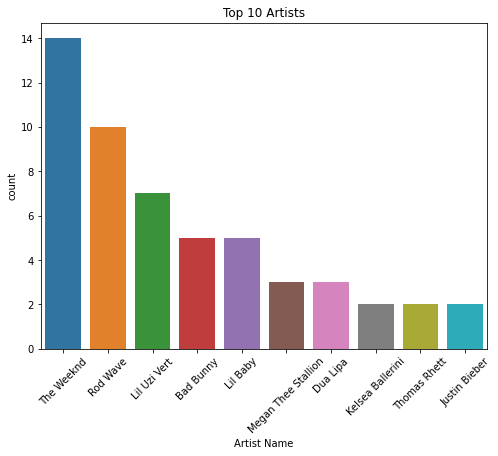

In [35]:
# artist counts (who has the most num of songs?)
plt.figure(figsize=[8,6])
ax = sns.countplot(x="artist_name", data=tracks, order=tracks['artist_name'].value_counts()[0:10].index)
plt.xlabel('Artist Name')
plt.title('Top 10 Artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plt.savefig("img/top_10_outlets.png", format="png")

## Lyrics Wordcloud
### All songs combined

In [41]:
# list of strings
lyric_list = [row for row in lyrics['text'].str.strip(to_strip=".!? \n\t\'")]  

In [42]:
lyric_text = " ".join(str(l) for l in lyric_list)
lyric_text2 = re.sub('[^A-Za-z]+', ' ', lyric_text).strip()

Text(0.5, 1.0, 'Top Words')

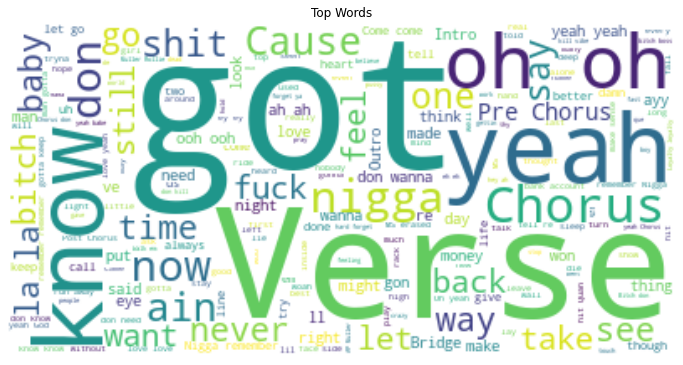

In [48]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(lyric_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top Words')

Text(0.5, 1.0, 'Top Words')

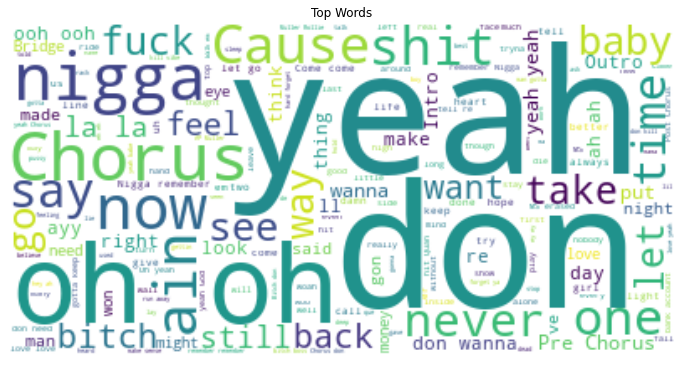

In [51]:
# wordcloud with updated/custom stopwords

sw2 = set(STOPWORDS)
sw2.update(['got', 'verse', 'know'])


wordcloud2 = WordCloud(stopwords=sw2, background_color="white").generate(lyric_text2)

plt.figure(figsize=[12,10])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Top Words')
